## Section 1: Data Importing

In [215]:
#importing packages for data cleaning and manipulation
import sys
sys.path.append('../') #ensures that the parent directory is in Python's search path, if later I decide to import functions from seperate py files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
#importing custom function from evaluate_model.py
from evaluate_model import evaluate_model

In [64]:
#importing data obtained from "https://archive.ics.uci.edu/dataset/73/mushroom"
#setting data path as outside src directory within data directory
data_path = os.path.join('..', 'data', 'agaricus-lepiota.data')\
#setting column names for the dataset, obtained from agaricus-lepiota.names
column_names = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape',
    'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
    'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color',
    'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'
]
#loading the data into a pandas dataframe, utilising our data path, column names and setting '?' as NaN as per agaricus-lepiota.names line #142
lepiota_data = pd.read_csv(data_path, header=None, names=column_names, na_values='?')

In [65]:
lepiota_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Section 2: Data Cleansing

In [66]:
#generating a table of missing data points
missing = pd.concat([lepiota_data.isnull().sum(), 100 * lepiota_data.isnull().mean()], axis=1)
missing.columns=['Missing Values', '%']
missing.sort_values(by='Missing Values', ascending=False)
#all missing data is consistent with that described in agaricus-lepiota.names lines #142-143

,Missing Values,%
stalk-root,2480,30.526834
cap-shape,0,0.000000
class,0,0.000000
cap-color,0,0.000000
bruises,0,0.000000
odor,0,0.000000
cap-surface,0,0.000000
gill-attachment,0,0.000000
gill-spacing,0,0.000000
gill-color,0,0.000000


In [67]:
#generating a table of instances of trailing or leading whitespace in the dataset
whitespace = lepiota_data.map(lambda x: isinstance(x, str) and (x != x.strip()))
whitespace = pd.concat([whitespace.sum(), 100 * whitespace.mean()], axis=1)
whitespace.columns = ['Whitespace Counts', '%']
whitespace.sort_values(by='Whitespace Counts', ascending=False)
#no whitespace in the dataset

,Whitespace Counts,%
class,0,0.0
cap-shape,0,0.0
cap-surface,0,0.0
cap-color,0,0.0
bruises,0,0.0
odor,0,0.0
gill-attachment,0,0.0
gill-spacing,0,0.0
gill-size,0,0.0
gill-color,0,0.0


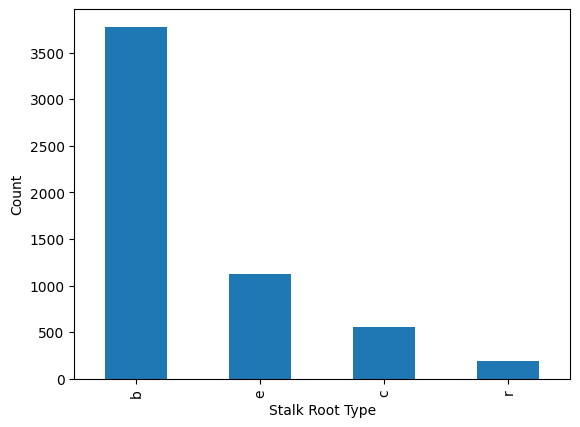

In [68]:
lepiota_data['stalk-root'].value_counts().plot(kind='bar')
plt.xlabel('Stalk Root Type')
plt.ylabel('Count')
plt.show()
#getting an idea of the distrubution of stalk root types in the dataset to inform how to handle missing data

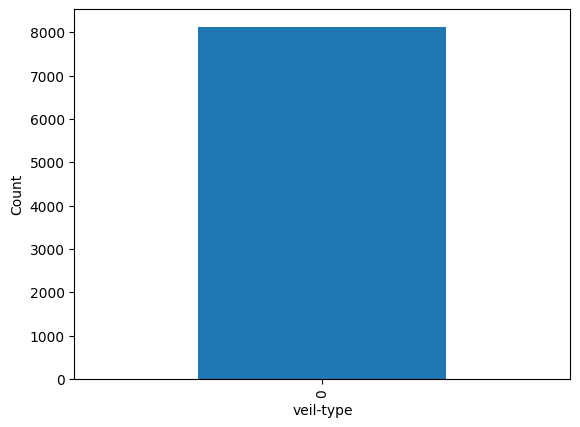

In [79]:
lepiota_data['veil-type'].value_counts().plot(kind='bar')
plt.xlabel('veil-type')
plt.ylabel('Count')
plt.show()
#veil-type is a constant value, so we can drop it from the dataset 
lepiota_data.drop(columns=['veil-type'], inplace=True)

In [70]:
#changing the missing values in the dataset to 'missing' to allow for easier handling of missing data later on
lepiota_data = lepiota_data.fillna(value='missing')
lepiota_data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [71]:
#renaming the 'class' column to 'poisonous' to better reflect the data and the target variable of the investigation
lepiota_data.rename(columns={'class': 'poisonous'}, inplace=True)
lepiota_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

## Section 3: Exploratory Data Analysis

#### 3.1: Uni-variate, Multi-variate and Statistical Investigation

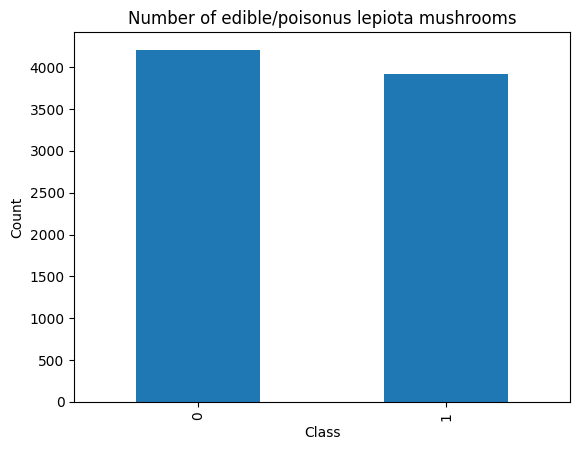

poisonous
0    0.517971
1    0.482029
Name: proportion, dtype: float64

In [77]:
#checking distrubution of focus variable
lepiota_data['poisonous'].value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Number of edible/poisonus lepiota mushrooms')
plt.show()
#poisonous mushrooms are more common in the dataset, but the disstribution is not heavily skewed thuy we can proceed with the data as is
lepiota_data['poisonous'].value_counts(normalize=True)

In [74]:
#importing a label encoder to convert the categorical data into numerical data
from sklearn.preprocessing import LabelEncoder

In [75]:
labelencoder = LabelEncoder()
#converting the categorical data into numerical data for more flexibility and compatability with mathematical operations, machine learning models etc.
for column in lepiota_data.columns:
    lepiota_data[column] = labelencoder.fit_transform(lepiota_data[column])
lepiota_data.head(1)

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5


C:\Users\Mont\AppData\Local\Temp\ipykernel_21844\1753776094.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  p.set_xticklabels(rotation=90, labels=lepiota_data.columns.drop('poisonous'))


[Text(0, 0, 'cap-shape'),
 Text(1, 0, 'cap-surface'),
 Text(2, 0, 'cap-color'),
 Text(3, 0, 'bruises'),
 Text(4, 0, 'odor'),
 Text(5, 0, 'gill-attachment'),
 Text(6, 0, 'gill-spacing'),
 Text(7, 0, 'gill-size'),
 Text(8, 0, 'gill-color'),
 Text(9, 0, 'stalk-shape'),
 Text(10, 0, 'stalk-root'),
 Text(11, 0, 'stalk-surface-above-ring'),
 Text(12, 0, 'stalk-surface-below-ring'),
 Text(13, 0, 'stalk-color-above-ring'),
 Text(14, 0, 'stalk-color-below-ring'),
 Text(15, 0, 'veil-type'),
 Text(16, 0, 'veil-color'),
 Text(17, 0, 'ring-number'),
 Text(18, 0, 'ring-type'),
 Text(19, 0, 'spore-print-color'),
 Text(20, 0, 'population'),
 Text(21, 0, 'habitat')]

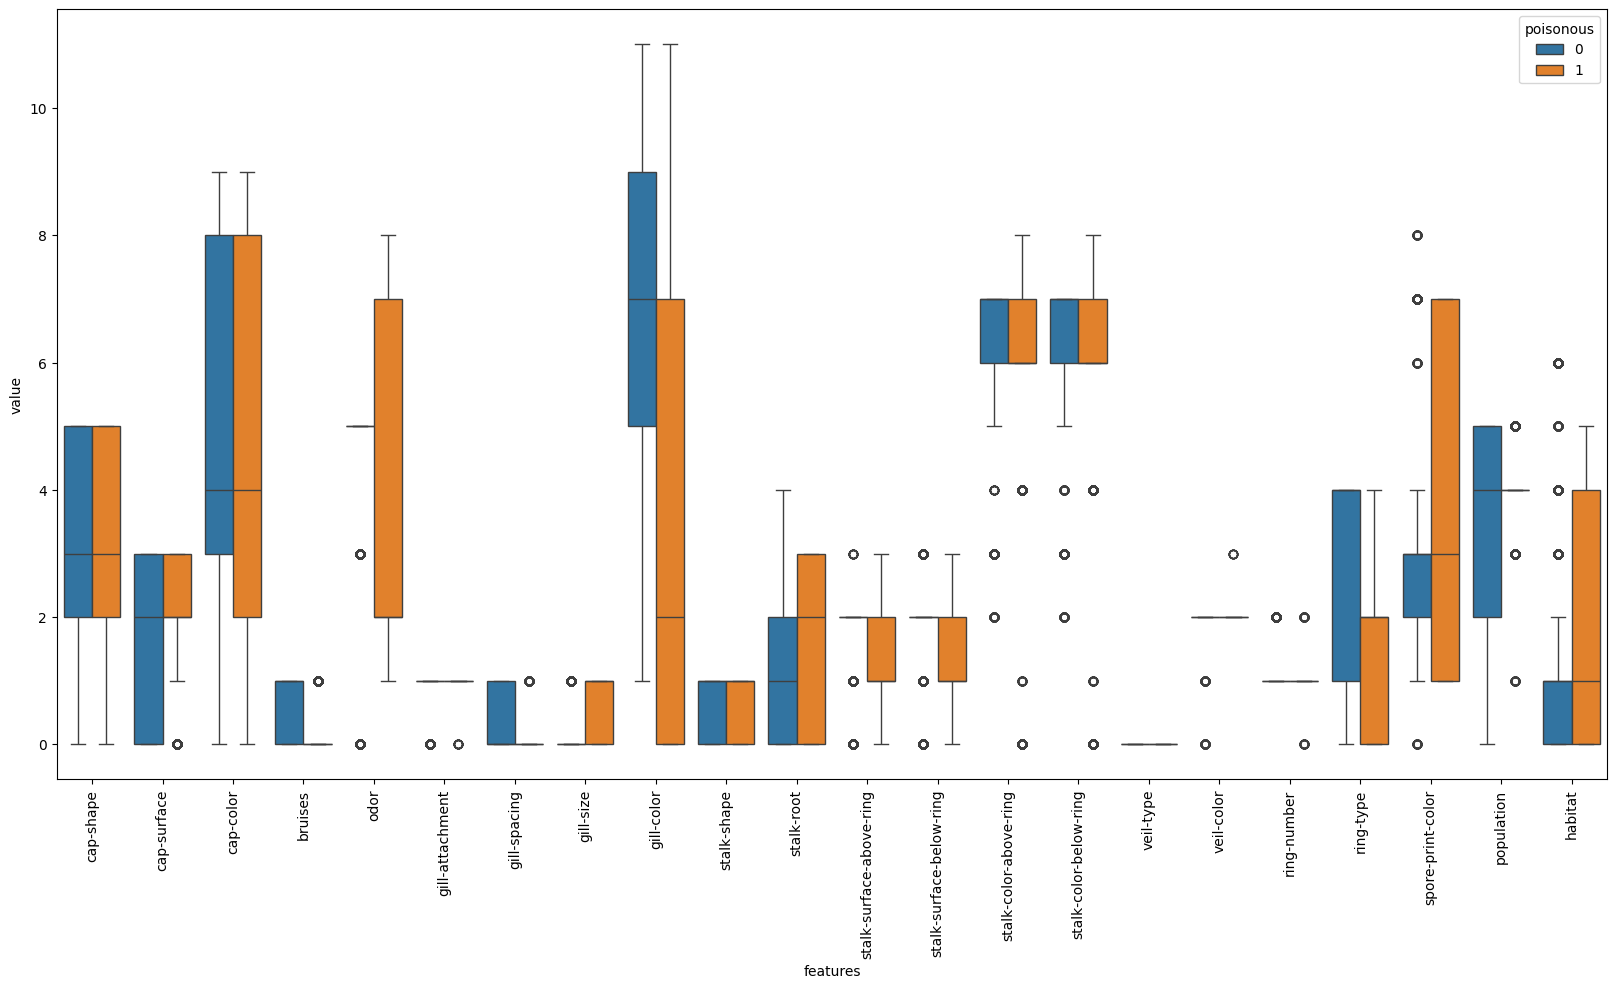

In [58]:
#multivariate analysis of column values for poisonus and edible lepiota mushrooms. Gives great insight into the variables most associated with poisonous or edible lepiota mushrooms
#melting the data frame to convert it from a wide format to a long format
lepiota_melt = pd.melt(lepiota_data, id_vars='poisonous', var_name='features', value_name='value')
#initialising a figure and axis object for plotting
fig, ax = plt.subplots(figsize=(20, 10))
#generating a boxplot of the data
p = sns.boxplot(ax = ax, x='features', y='value', hue='poisonous', data=lepiota_melt)
#improving the readability of the plot and ensuring the poisonus label is dropped from the x axis
p.set_xticklabels(rotation=90, labels=lepiota_data.columns.drop('poisonous'))
#the error can be ignored as it doesnt account for the dropped poisonous label, and assumes were plotting with +1 xtick  



(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 [Text(0, 0.5, 'poisonous'),
  Text(0, 1.5, 'cap-shape'),
  Text(0, 2.5, 'cap-surface'),
  Text(0, 3.5, 'cap-color'),
  Text(0, 4.5, 'bruises'),
  Text(0, 5.5, 'odor'),
  Text(0, 6.5, 'gill-attachment'),
  Text(0, 7.5, 'gill-spacing'),
  Text(0, 8.5, 'gill-size'),
  Text(0, 9.5, 'gill-color'),
  Text(0, 10.5, 'stalk-shape'),
  Text(0, 11.5, 'stalk-root'),
  Text(0, 12.5, 'stalk-surface-above-ring'),
  Text(0, 13.5, 'stalk-surface-below-ring'),
  Text(0, 14.5, 'stalk-color-above-ring'),
  Text(0, 15.5, 'stalk-color-below-ring'),
  Text(0, 16.5, 'veil-color'),
  Text(0, 17.5, 'ring-number'),
  Text(0, 18.5, 'ring-type'),
  Text(0, 19.5, 'spore-print-color'),
  Text(0, 20.5, 'population'),
  Text(0, 21.5, 'habitat')])

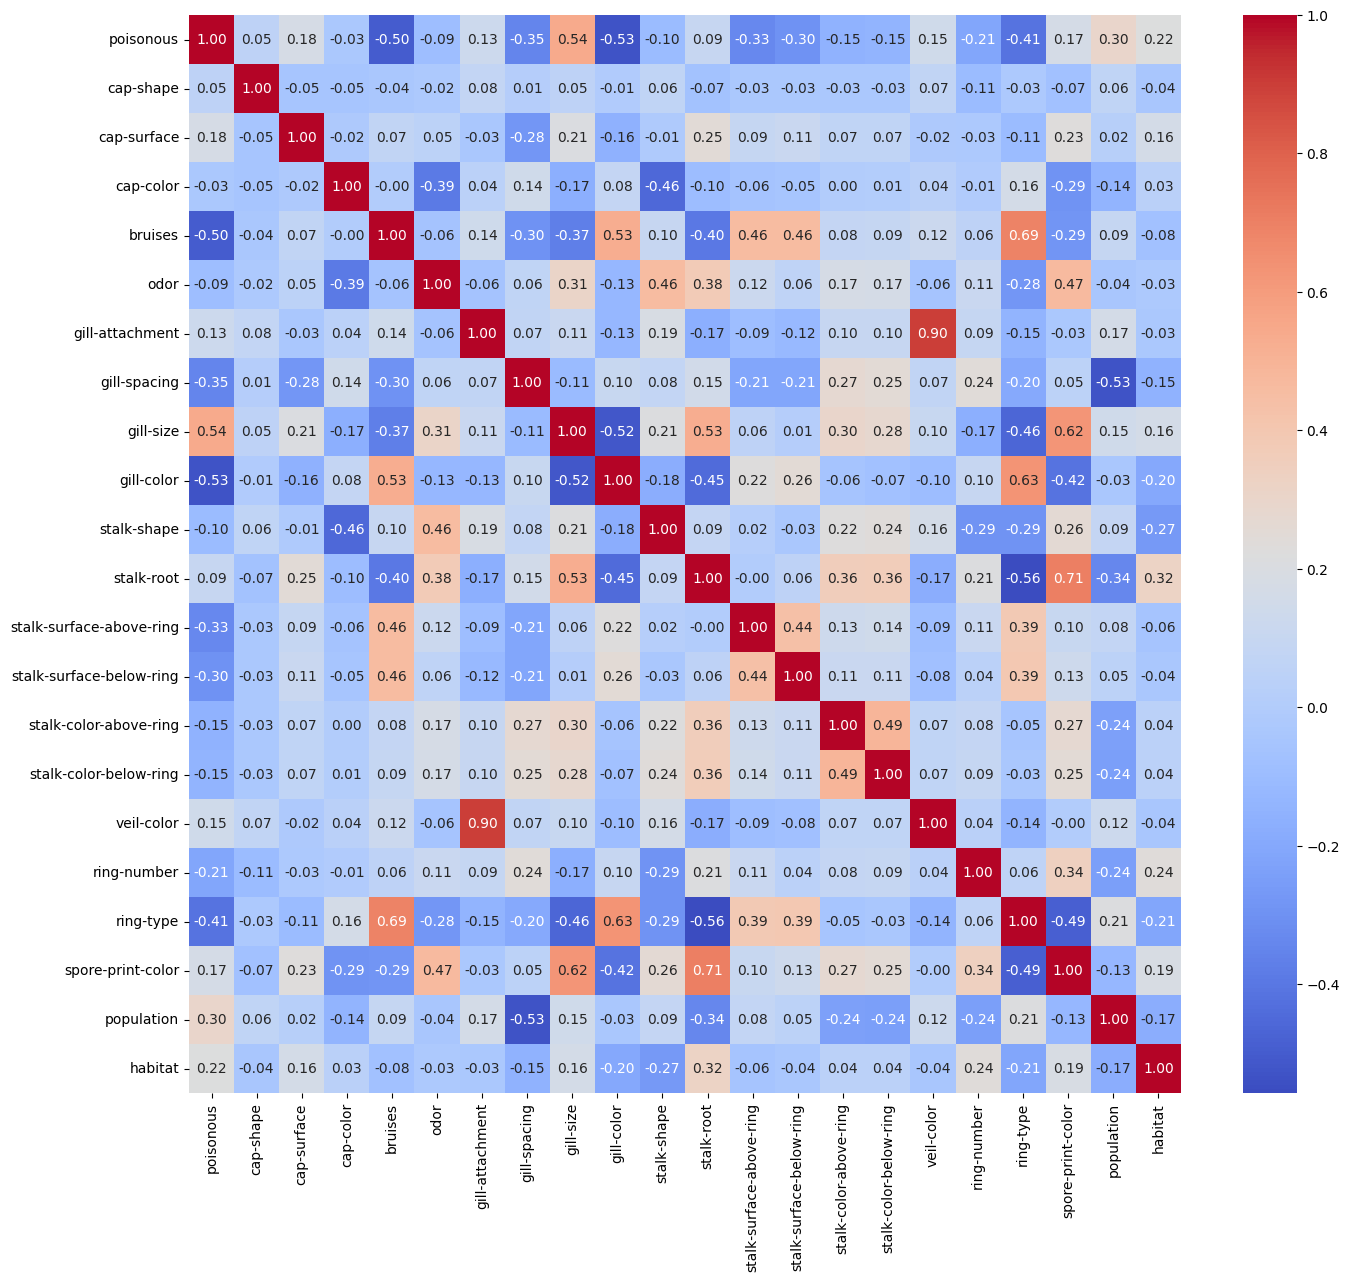

In [87]:
#pairwise correltion of variables in the dataset, positive values closer to 1 indicate strong positive correlation, negative values closer to -1 indicate strong negative correlation
plt.figure(figsize=(16, 14))
sns.heatmap(lepiota_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.yticks(rotation=0)

### 3.2: Random Forest Regressor

In [88]:
#random forest regressor to determine the importance of each feature in the dataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [89]:
#defining the feature matrix as X, and removing target vector
X = lepiota_data.drop(['poisonous'], axis=1)
#defining the target vector as y
y = lepiota_data['poisonous']

#splitting the data into training and testing sets to allow for model validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)

Text(0.5, 0, 'Random Forest Feature Importance')

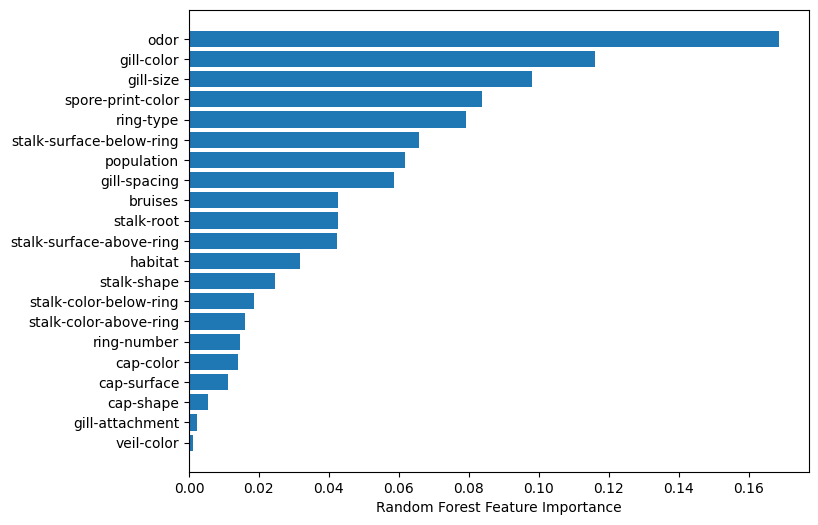

In [96]:
#defining the random forest classifier model and fitting it to the training data
rf = RandomForestClassifier(n_estimators=100, random_state=666)
rf.fit(X_train, y_train)
#returning the importance of each feature in the dataset
rf.feature_importances_
#sorting the features by importance
sorted_idx = rf.feature_importances_.argsort()
#plotting the feature importance
plt.figure(figsize=(8, 6))
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel('Random Forest Feature Importance')
#this plot gives an idea of how important each feature is in defining whether a lepiota mushroom is poisonous or edible


In [196]:
#predicting the target variable using the random forest model and the test data
y_pred_rf = rf.predict(X_test)

In [217]:
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score

#getting the accuracy score of the model
print("Test Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_rf)*100))
#print("Test Accuracy: {:.2f}%".format(rf.score(X_test, y_test)*100)) #alternative method to calculate accuracy score for when y_pred_rf is not available/not generated
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf)) 
rf_mse = mean_squared_error(y_test, y_pred_rf) 
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

rf_evaluation = pd.DataFrame({
    'Model': ['RandomForestRegressor'],
    'RMSE': [rf_rmse],
    'MSE': [rf_mse],
    'MAE': [rf_mae],
    'R2': [rf_r2]
})
print(rf_evaluation.to_string(index=False))
"""
these are incredible accuracy scores for the model and indicate perfect model performance
seriously this may be the first time this has ever happened and im not even happy
i dont like it, it feels wrong but ive gone over the code atleast 5 times and cant find any issues
i guess the data is just really good for this model
"""

Test Accuracy: 100.00%
                Model  RMSE  MSE  MAE  R2
RandomForestRegressor   0.0  0.0  0.0 1.0


'\nthese are incredible accuracy scores for the model and indicate perfect model performance\nseriously this may be the first time this has ever happened and im not even happy\ni dont like it, it feels wrong but ive gone over the code atleast 5 times and cant find any issues\ni guess the data is just really good for this model\n'

In [218]:
rf_data = [('Random Forrest Regressor', y_test, y_pred_rf)]
rf_evaluation = evaluate_model(*rf_data)
display(rf_evaluation)
#this output is functinally the exact same as above but in a more readable format. 
#for the regression evaluations this will be useful as I can use the function and not have the above code appear multiple times

s:\Code\Mushroom Data Science\src\evaluate_model.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  evaluation_table = pd.concat([evaluation_table, result_row], ignore_index=True)


,Model,RMSE,MSE,MAE,R2
0,Random Forrest Regressor,0.0,0.0,0.0,1.0


### 3.3 K-Nearest-Neighbour

100%|██████████| 20/20 [00:05<00:00,  3.45it/s]

After iterating through k values ranging from 1 to 20:
the best K Value was 2, with an accuracy of 100.00%


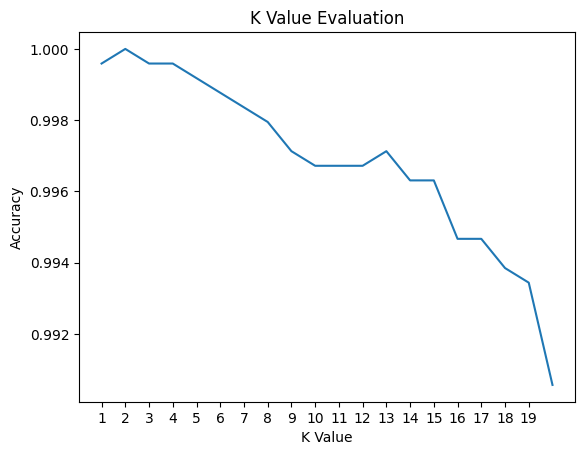

In [153]:
#KNN modeling
from sklearn.neighbors import KNeighborsClassifier
#helpful little package that does a progress bar for loops
from tqdm import tqdm
#initialising variables to store the best K value and the best accuracy score
best_Kvalue = 0
best_score = 0
#initialising lists to store the K values and their corresponding accuracy scores
knn_x = []
knn_y = []
#iterating through K values from 1 to 20 to determine the best K value for the model
for i in tqdm(range(1,21)):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    knn_x.append(i)
    knn_y.append(score) 
    if score > best_score:
        best_score = score
        best_Kvalue = i
#plotting the K values against their corresponding accuracy scores
plt.plot(knn_x, knn_y)
plt.title("K Value Evaluation")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.xticks(range(1,20))
#returning the best K value and the corresponding accuracy score
print("After iterating through k values ranging from 1 to 20:")
print("the best K Value was {}, with an accuracy of {:.2f}%".format(best_Kvalue, best_score * 100))

In [159]:
from sklearn.metrics import classification_report
#defining the KNN model with the best K value and fitting it to the training data
knn = KNeighborsClassifier(n_neighbors=best_Kvalue)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
#predicting the target variable using the KNN model and the test data and generating a classification report
print("KNN classifier report:\n\n", classification_report(y_test, y_pred_knn))
#superb model performance

KNN classifier report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1254
           1       1.00      1.00      1.00      1184

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



Text(95.72222222222221, 0.5, 'True Label')

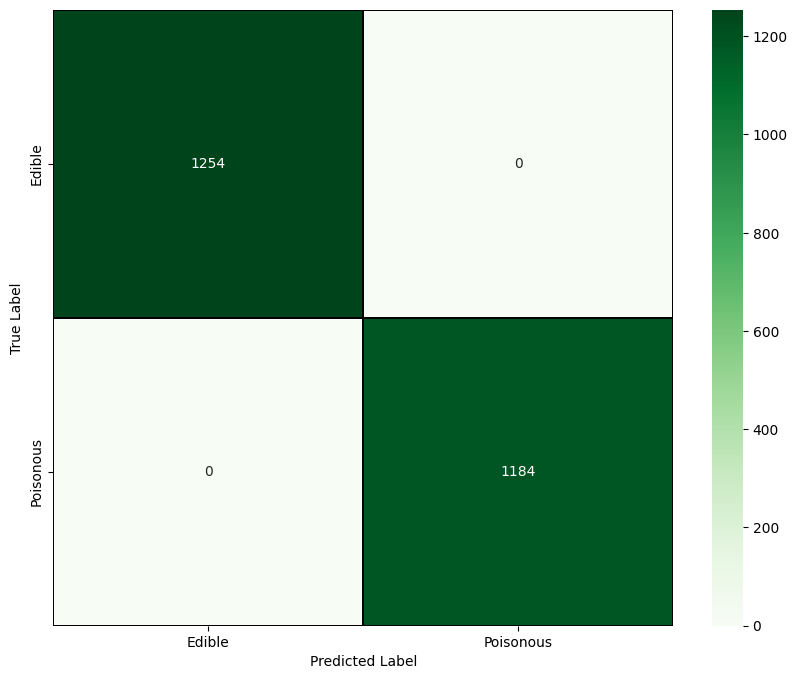

In [188]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_knn)
x_axis_labels = ['Edible', 'Poisonous']
y_axis_labels = ['Edible', 'Poisonous']
f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cm, annot=True, linewidths=0.2, linecolor='black', fmt='.0f', cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')    

### 3.4 Regression, Ridge and Lasso

In [225]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
#initialising the linear regression, logistic regression, lasso and ridge models
linr = LinearRegression()
logr = LogisticRegression()
lasso = Lasso()
ridge = Ridge() 
#fitting the models to the training data
linr.fit(X_train, y_train)
logr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
#predicting the target variable using the models and the test data
y_pred_linr = linr.predict(X_test)
y_pred_logr = logr.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

s:\Code\Mushroom Data Science\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#evaluating the models using the evaluate_model function
regression_data = [('Linear Regression', y_test, y_pred_rf),
           ('Logistic Regression', y_test, y_pred_logr),
           ('Lasso', y_test, y_pred_lasso),
           ('Ridge', y_test, y_pred_ridge)]
regression_evaluation = evaluate_model(*regression_data)
display(regression_evaluation)

s:\Code\Mushroom Data Science\src\evaluate_model.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  evaluation_table = pd.concat([evaluation_table, result_row], ignore_index=True)


,Model,RMSE,MSE,MAE,R2
0,Linear Regression,0.000000,0.000000,0.000000,1.000000
1,Logistic Regression,0.215289,0.046349,0.046349,0.814449
2,Lasso,0.499821,0.249821,0.499439,-0.000107
3,Ridge,0.247045,0.061031,0.170731,0.755674


### 3.5: All models metrics in one place

###### note: this will only work if all the above cells have ran atleast once 


In [226]:
#evaluating all models featured using the evaluate_model function
model_data_all =    [
                    ('Random Forrest Regressor', y_test, y_pred_rf),
                    ('K-Nearest-Neighbour', y_test, y_pred_knn),
                    ('Linear Regression', y_test, y_pred_rf),
                    ('Logistic Regression', y_test, y_pred_logr),
                    ('Lasso', y_test, y_pred_lasso),
                    ('Ridge', y_test, y_pred_ridge),
                    ]
model_all_evaluation = evaluate_model(*model_data_all)
display(model_all_evaluation)

s:\Code\Mushroom Data Science\src\evaluate_model.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  evaluation_table = pd.concat([evaluation_table, result_row], ignore_index=True)


,Model,RMSE,MSE,MAE,R2
0,Random Forrest Regressor,0.000000,0.000000,0.000000,1.000000
1,K-Nearest-Neighbour,0.000000,0.000000,0.000000,1.000000
2,Linear Regression,0.000000,0.000000,0.000000,1.000000
3,Logistic Regression,0.215289,0.046349,0.046349,0.814449
4,Lasso,0.499821,0.249821,0.499439,-0.000107
5,Ridge,0.247045,0.061031,0.170731,0.755674
